In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend.


In [2]:
def plotter(days, predicted, actual):
    #Visualization
    fig = plt.figure(num=None, figsize=(6, 4), dpi=150, facecolor='w', edgecolor='k')
    plt.plot(days, predicted, color='red', label = 'Predicted Stock Price')
    plt.plot(days, actual, color='blue', label = 'Real Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    fig.autofmt_xdate()
    plt.legend()
    plt.show()

In [3]:
def prepare_data(X, tmstmp):
    X_t=[]
    y_t=[]
    for i in range(tmstmp, X.shape[0]):
        X_t.append(X[i - tmstmp:i,:-1])
        y_t.append(X[i,-1])
    X_t, y_t = np.array(X_t), np.array(y_t)
    y_t = y_t.reshape(y_t.shape[0],1)
    return X_t, y_t

In [4]:
def LSTM_algo(X_train, nHiddenLayers, cell, optimizer, loss):
    regressor=Sequential()

    regressor.add(LSTM(units = cell, return_sequences=True, input_shape = X_train.shape[1:]))
    regressor.add(Dropout(0.4))
    
    for i in range(nHiddenLayers - 1):
        regressor.add(LSTM(units=cell,return_sequences=True))
        regressor.add(Dropout(0.6))
    
    regressor.add(LSTM(units=cell))
    regressor.add(Dropout(0.4))

    regressor.add(Dense(units = 1))

    regressor.compile(optimizer='adam',loss='mean_squared_error')
    
    return regressor


In [5]:
def combinator():
    for n in layerList:
        for cell in cells:
            for ts in timestamp:  
                print("Combination: ",(n, cell, ts))
                X_train, y_train = prepare_data(training, ts)

                regressor = LSTM_algo(X_train, n, cell, optimizer = 'adam', loss = 'mean_squared_error')

                regressor.fit(X_train,y_train,epochs = epochs,batch_size = 32)

                stacked_validation = np.vstack((training[len(training) - ts : , :],validation))

                X_test, y_test = prepare_data(stacked_validation, ts)

                predicted_y = regressor.predict(X_test)
                stacked_validation = stacked_validation[ts:,:]
                y_true = MMsc.inverse_transform(stacked_validation)[:,-1]
                for i in range(len(predicted_y)):
                    stacked_validation[i,-1] = predicted_y[i]
                y_predicted = MMsc.inverse_transform(stacked_validation)[:,-1]

                plotter(days, y_predicted, y_true)


In [6]:
DataSet = pd.read_csv('./../input_data/GoogleStocks.csv', thousands = ',')
DataSet = DataSet.iloc[1:,:]
DataSet = DataSet.sort_index(axis=0 ,ascending=False)

DataSet['date'] = pd.to_datetime(DataSet['date'].astype(str),format='%Y/%m/%d')
train_data, test_data = train_test_split(DataSet, test_size = 0.20, shuffle=False)
days = np.array(test_data['date'], dtype="datetime64[ms]")
# DataSet

In [7]:
DataSet['avg'] = DataSet[['high','low']].mean(axis = 1)
DataSet = DataSet[['volume','avg','open']]
# DataSet

In [8]:
MMsc = MinMaxScaler(feature_range = (0, 1))
DataSet_scaled = MMsc.fit_transform(DataSet)

In [9]:
training, validation = np.split(DataSet_scaled, [int(0.8*len(DataSet_scaled))])


In [10]:
layerList = [2,3]
cells = [30,50,80]
timestamp = [20,50,75]
epochs = 100

Combination:  (2, 30, 20)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
584/584 [==============================] - 2s 4ms/step - loss: 0.1082
Epoch 2/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0294
Epoch 3/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 4/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0140
Epoch 5/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0121
Epoch 6/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0127
Epoch 7/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0122
Epoch 8/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0107
Epoch 9/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0093
E

584/584 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 89/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 90/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0047
Epoch 91/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 92/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 93/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 94/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 95/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 96/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 97/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0041
Epoch 98/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 99/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 100/100
584

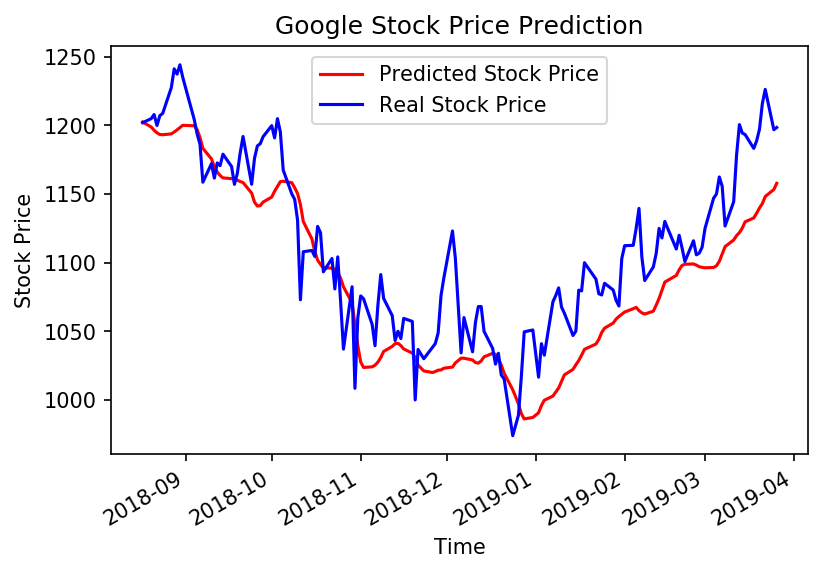

Combination:  (2, 30, 50)
Epoch 1/100
554/554 [==============================] - 4s 6ms/step - loss: 0.0948
Epoch 2/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0240
Epoch 3/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0159
Epoch 4/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0142
Epoch 5/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0152
Epoch 6/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0163
Epoch 7/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0126
Epoch 8/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0115
Epoch 9/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0113
Epoch 10/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 11/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0107
Epoch 12/100
554/554 [==============================] - 2s 3ms/step - 

554/554 [==============================] - 2s 3ms/step - loss: 0.0037
Epoch 100/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0041


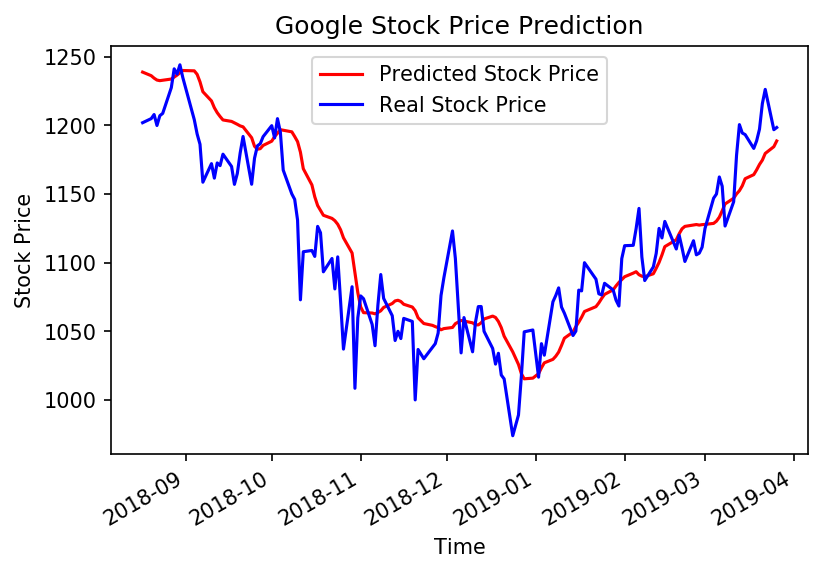

Combination:  (2, 30, 75)
Epoch 1/100
529/529 [==============================] - 5s 9ms/step - loss: 0.1172
Epoch 2/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0302
Epoch 3/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0208
Epoch 4/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0187
Epoch 5/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0153
Epoch 6/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0130
Epoch 7/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0136
Epoch 8/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0124
Epoch 9/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0145
Epoch 10/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0118
Epoch 11/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0098
Epoch 12/100
529/529 [==============================] - 3s 5ms/step - 

529/529 [==============================] - 2s 5ms/step - loss: 0.0041
Epoch 100/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0040


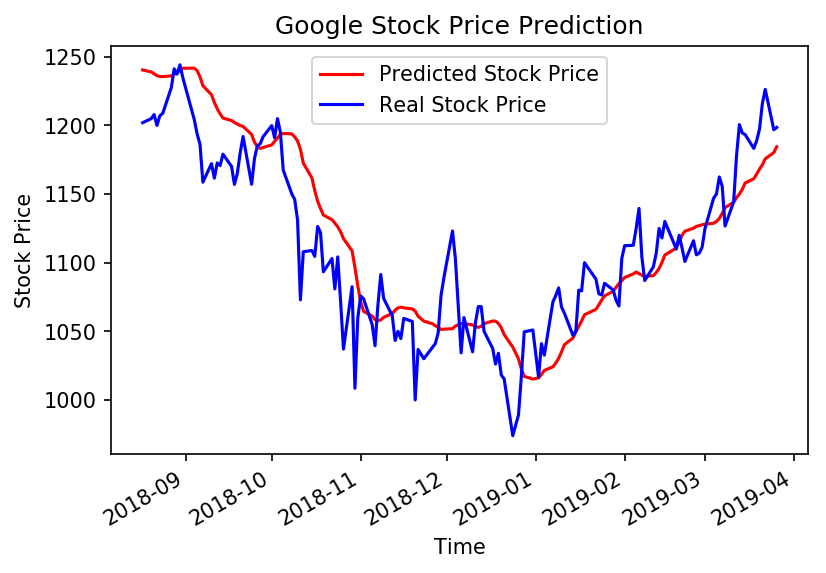

Combination:  (2, 50, 20)
Epoch 1/100
584/584 [==============================] - 3s 5ms/step - loss: 0.0583
Epoch 2/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 3/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0100
Epoch 4/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0100
Epoch 5/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0090
Epoch 6/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0089
Epoch 7/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 8/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 9/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0093
Epoch 10/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 11/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 12/100
584/584 [==============================] - 1s 1ms/step - 

584/584 [==============================] - 1s 1ms/step - loss: 0.0033
Epoch 100/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0026


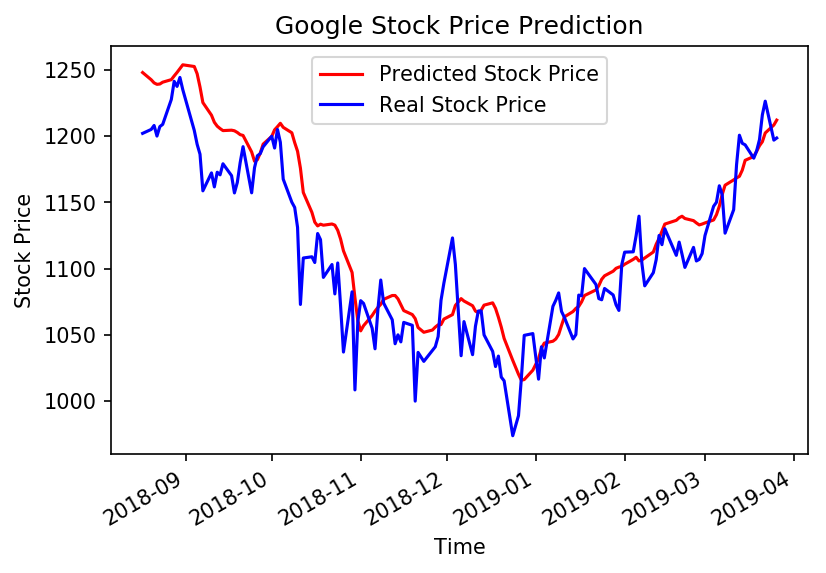

Combination:  (2, 50, 50)
Epoch 1/100
554/554 [==============================] - 4s 8ms/step - loss: 0.0806
Epoch 2/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0188
Epoch 3/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch 4/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch 5/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 6/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0094
Epoch 7/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0103
Epoch 8/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0103
Epoch 9/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0083
Epoch 10/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0097
Epoch 11/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0077
Epoch 12/100
554/554 [==============================] - 2s 3ms/step - 

554/554 [==============================] - 2s 3ms/step - loss: 0.0031
Epoch 100/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0033


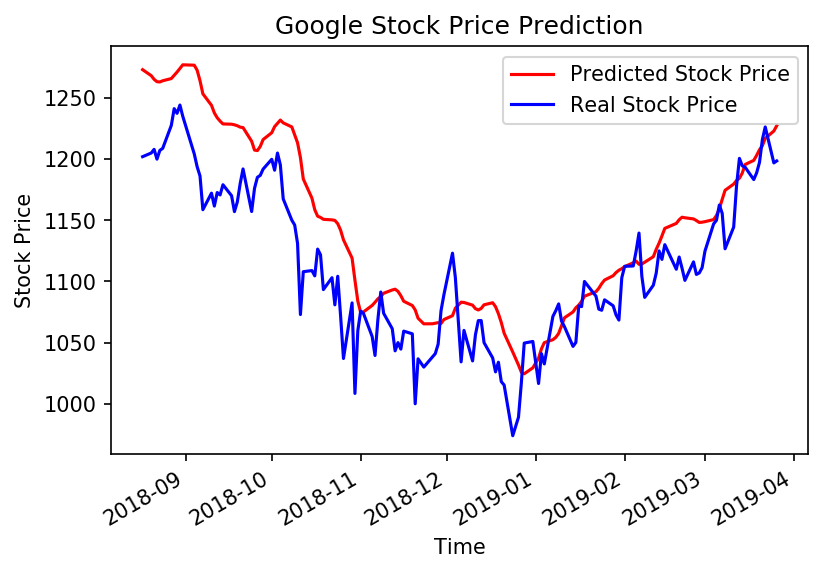

Combination:  (2, 50, 75)
Epoch 1/100
529/529 [==============================] - 5s 10ms/step - loss: 0.0719
Epoch 2/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0190
Epoch 3/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0117
Epoch 4/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0109
Epoch 5/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0099
Epoch 6/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0082
Epoch 7/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0096
Epoch 8/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0092
Epoch 9/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0083
Epoch 10/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0076
Epoch 11/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0074
Epoch 12/100
529/529 [==============================] - 2s 5ms/step -

529/529 [==============================] - 2s 5ms/step - loss: 0.0032
Epoch 100/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0034


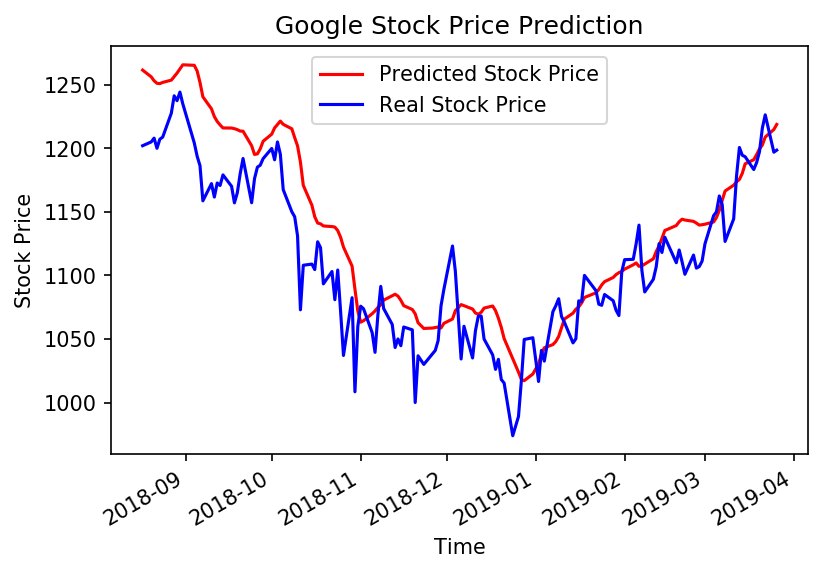

Combination:  (2, 80, 20)
Epoch 1/100
584/584 [==============================] - 4s 7ms/step - loss: 0.0540
Epoch 2/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0099
Epoch 3/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 4/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0082
Epoch 5/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 6/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 7/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 8/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 9/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 10/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 11/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 12/100
584/584 [==============================] - 1s 1ms/step - 

584/584 [==============================] - 1s 1ms/step - loss: 0.0027
Epoch 100/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0021


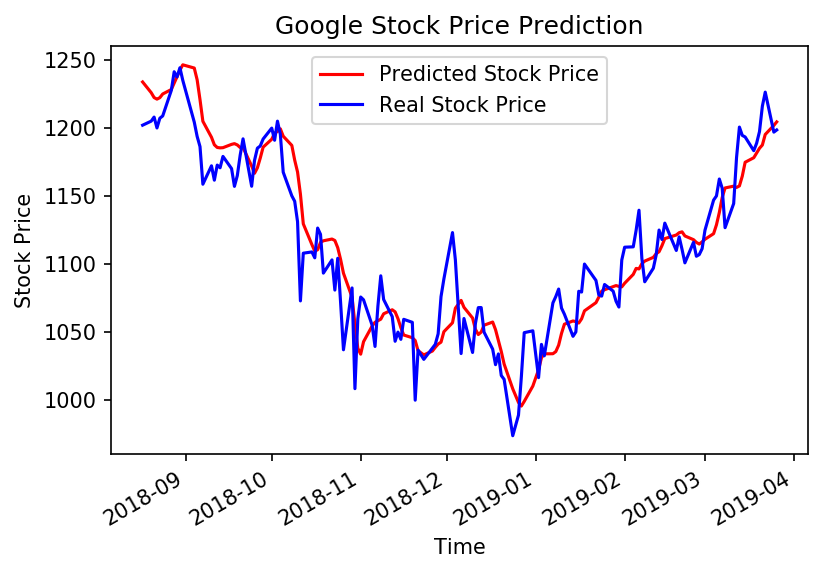

Combination:  (2, 80, 50)
Epoch 1/100
554/554 [==============================] - 5s 9ms/step - loss: 0.0609
Epoch 2/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0133
Epoch 3/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0076
Epoch 4/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0071
Epoch 5/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0072
Epoch 6/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0091
Epoch 7/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0058
Epoch 8/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0071
Epoch 9/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0078
Epoch 10/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0062
Epoch 11/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0060
Epoch 12/100
554/554 [==============================] - 2s 3ms/step - 

554/554 [==============================] - 2s 3ms/step - loss: 0.0025
Epoch 100/100
554/554 [==============================] - 2s 3ms/step - loss: 0.0024


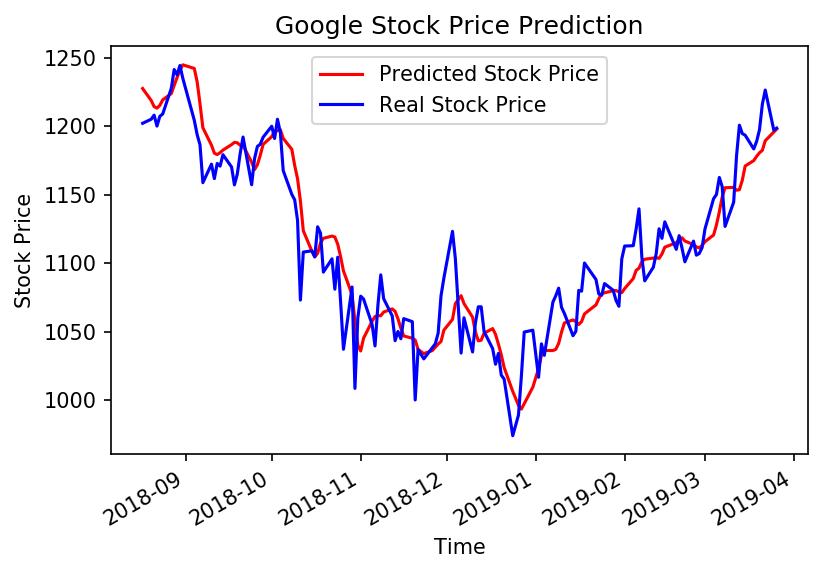

Combination:  (2, 80, 75)
Epoch 1/100
529/529 [==============================] - 6s 12ms/step - loss: 0.0598
Epoch 2/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0116
Epoch 3/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0075
Epoch 4/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0080
Epoch 5/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0077
Epoch 6/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0073
Epoch 7/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0084
Epoch 8/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0063
Epoch 9/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0065
Epoch 10/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0054
Epoch 11/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0064
Epoch 12/100
529/529 [==============================] - 3s 5ms/step -

529/529 [==============================] - 3s 5ms/step - loss: 0.0022
Epoch 100/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0027


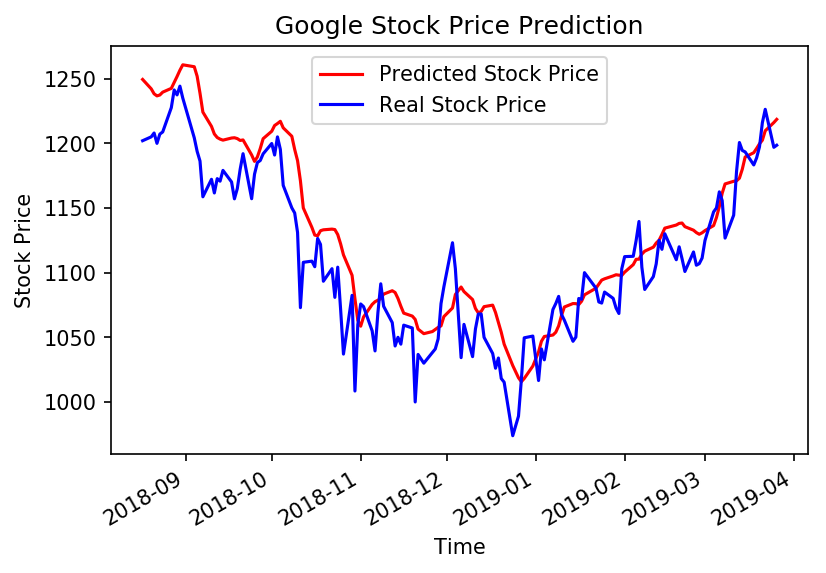

Combination:  (3, 30, 20)
Epoch 1/100
584/584 [==============================] - 6s 10ms/step - loss: 0.0944
Epoch 2/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0260
Epoch 3/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0155
Epoch 4/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0140
Epoch 5/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0118
Epoch 6/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0111
Epoch 7/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0125
Epoch 8/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0121
Epoch 9/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0126
Epoch 10/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0122
Epoch 11/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0104
Epoch 12/100
584/584 [==============================] - 1s 2ms/step -

584/584 [==============================] - 1s 2ms/step - loss: 0.0037
Epoch 100/100
584/584 [==============================] - 1s 2ms/step - loss: 0.0046


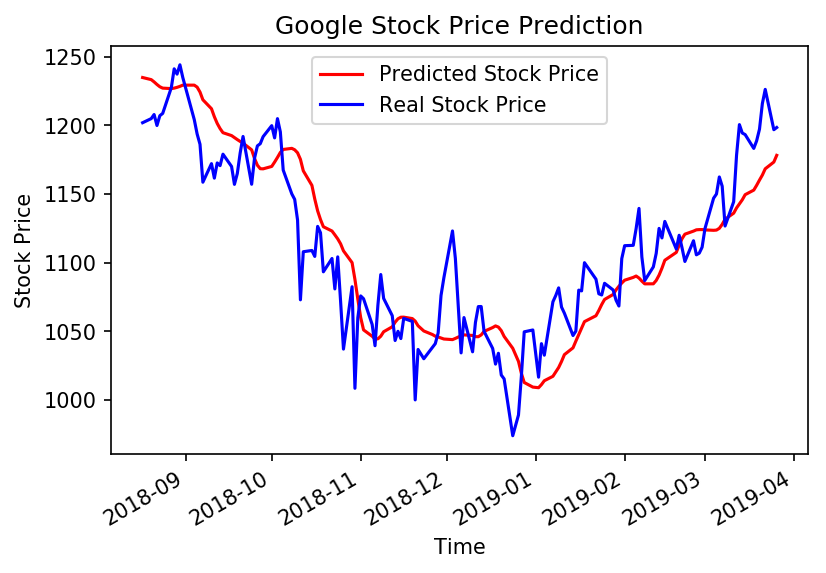

Combination:  (3, 30, 50)
Epoch 1/100
554/554 [==============================] - 7s 13ms/step - loss: 0.1015
Epoch 2/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0268
Epoch 3/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0153
Epoch 4/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0152
Epoch 5/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0130
Epoch 6/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0134
Epoch 7/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0148
Epoch 8/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0122
Epoch 9/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0126
Epoch 10/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0124
Epoch 11/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0116
Epoch 12/100
554/554 [==============================] - 2s 4ms/step -

KeyboardInterrupt: 

In [11]:
combinator()